# load files

In [1]:
import glob
import os
# path for single animal
dPath = "/media/DATA/MAK/GRISZ_02/AA0001"
# dPath = "/media/DATA/MAK/GRISZ_03/AA0001"
# dPath = "/media/DATA/MAK/GRISZ_05/AA0001"
# dPath = "/media/DATA/MAK/TL_B10_Mouse07/AA0001"
# dPath = "/media/DATA/MAK/TL_B10_Mouse08/AA0001"

# look at 7 and 8
qFiles = glob.glob(os.path.join(dPath,'*.qcamraw'))

# not ZX1
# qFiles = [f for f in qFiles if "ZXXX" not in f]
# for zx1
# qFiles = [f for f in qFiles if "ZXXX" in f]

qFiles

['/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0015.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0017.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0018.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0019.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0020.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0021.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0022.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0032.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0033.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0034.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0036.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0037.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0038.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0039.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0040.qcamraw',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0041.qcamraw

In [2]:
len(qFiles)

94

# explore experiment

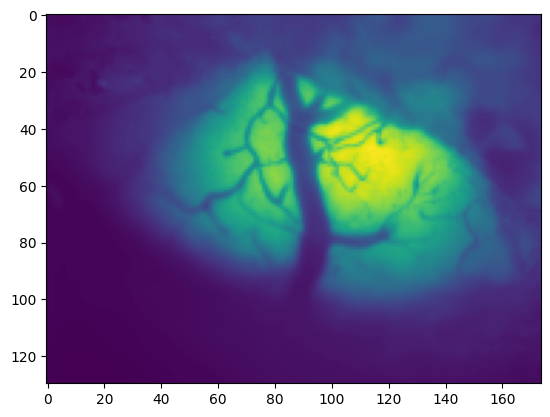

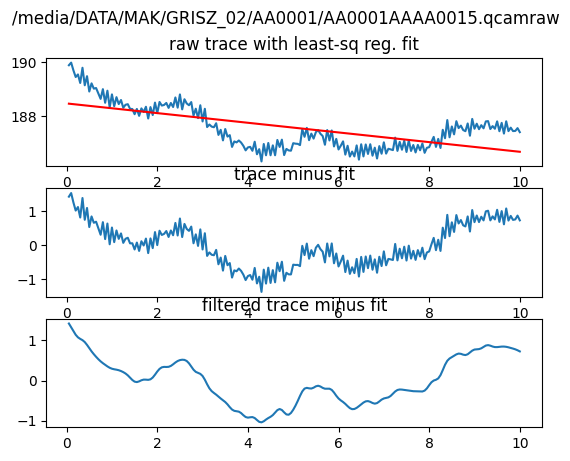

In [3]:
import os
from lib.qcam import *

imgs,headers = getAllImgs(qFiles)
t = getTimeVec(imgs[0].shape[2],zeroStart=False)

plotAvgImg(np.array(imgs).mean(axis=(0)))
fig,ax = plotTraceAvgImg(t,imgs[0])
fig.suptitle(os.path.join(dPath,qFiles[0]))
fig.show()

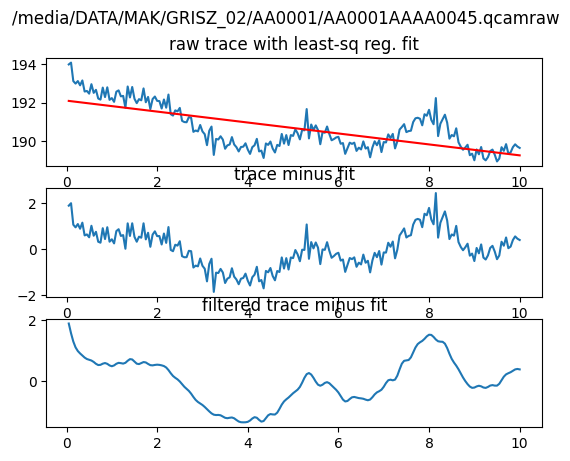

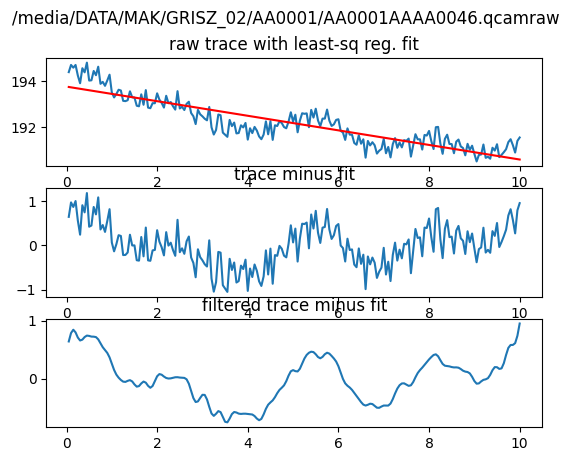

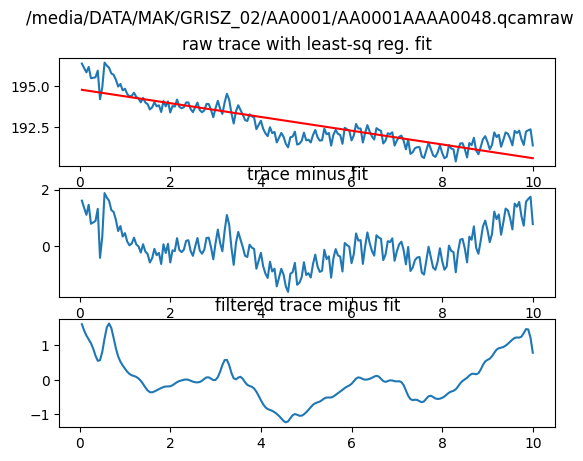

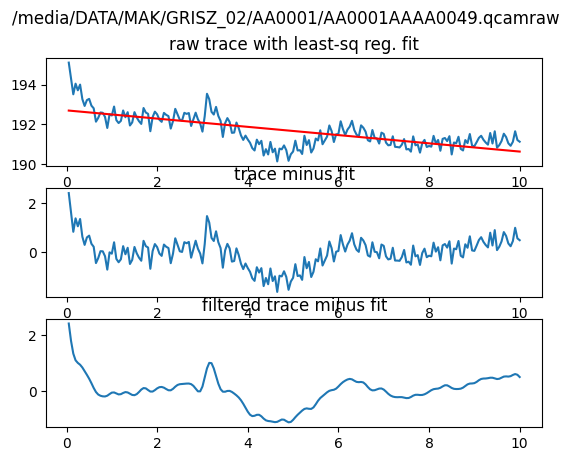

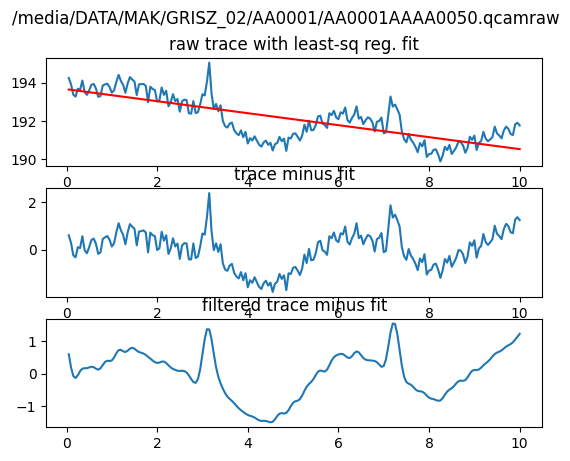

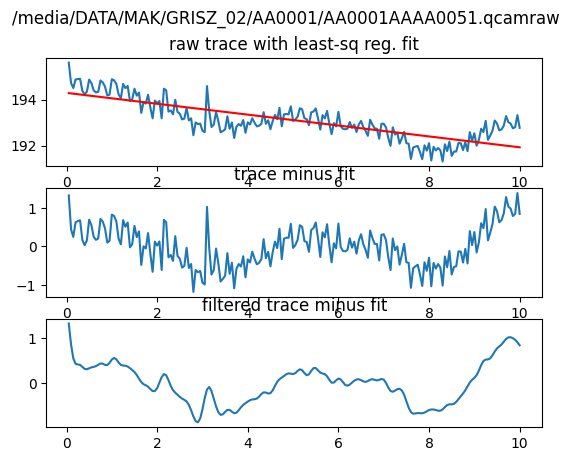

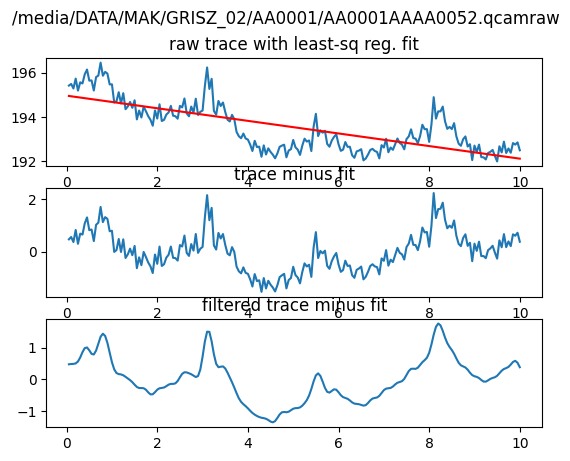

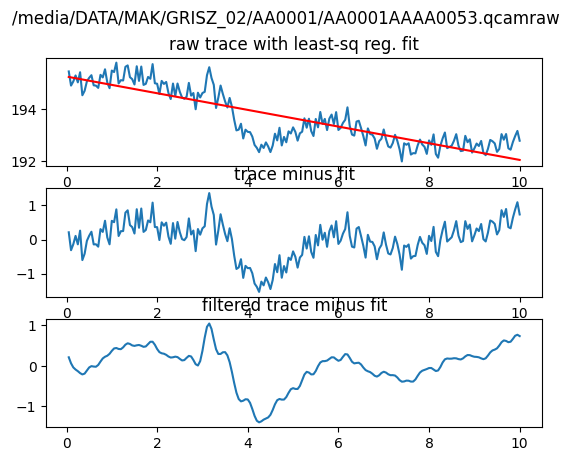

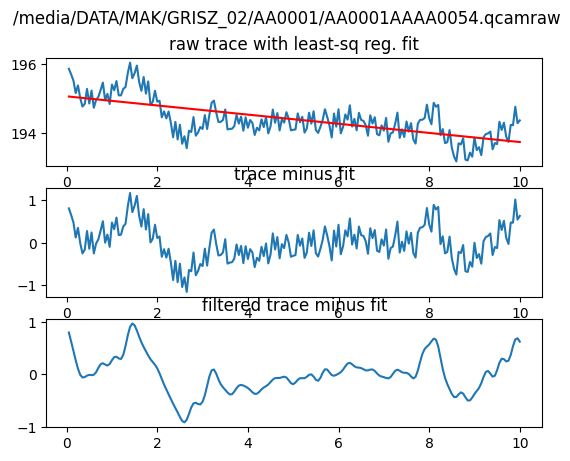

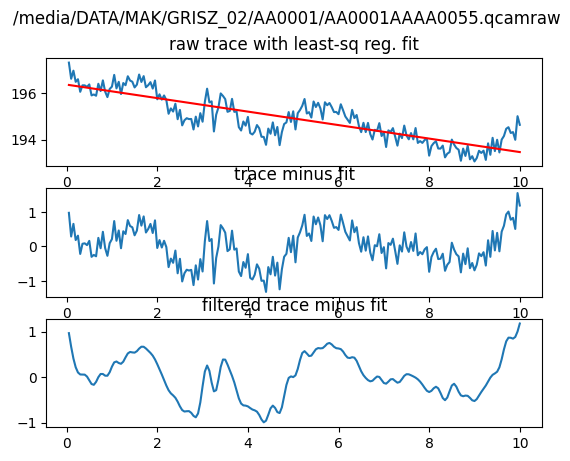

In [4]:
for file,im in zip(qFiles[20:30],imgs[20:30]):
    fig,ax = plotTraceAvgImg(t,im)
    fig.suptitle(file)
    fig.show()

Text(0.5, 1.0, '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0055.qcamraw')

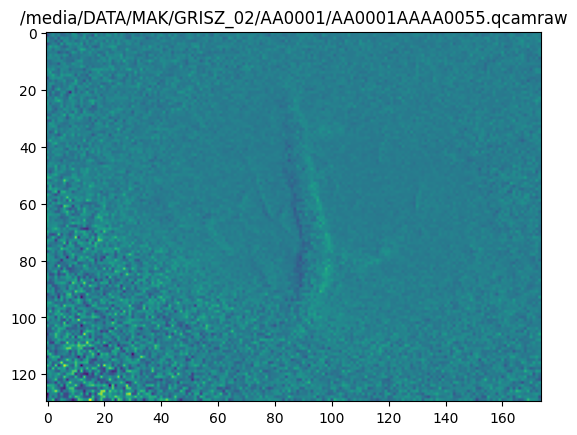

In [5]:
from lib.qcam import calcSpatialDFFresp
# defaults:
# def calcSpatialDFFresp(img, t: np.ndarray, frameRate: int = 20,
#                baseline: tuple[int] = (2,3),
#                stimlen: float = 0.4,
#                temporalAvgFrameSpan: int = 10,
#                applyButterFilter: bool = True)
plt.imshow(calcSpatialDFFresp(imgs[29], t, stimlen=0.1, temporalAvgFrameSpan=10))
plt.title(os.path.join(dPath,file))

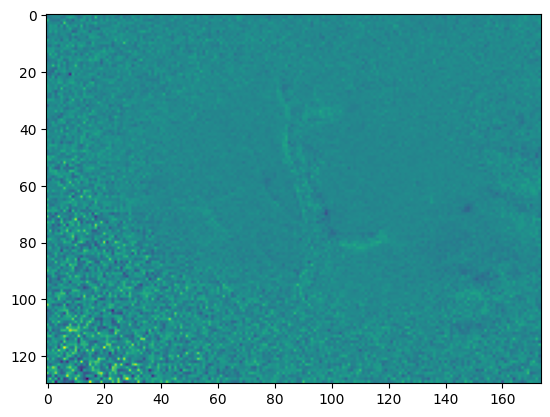

In [6]:
t_baseline = (2,3)
t_spatialAvg = (4,8)
cutoff = 0.5
stimlen = 0.1
temporalAvgFrameSpan = 8

plt.imshow(calcSpatialDFFresp(imgs[29], t, 
                              t_baseline=t_baseline,
                              t_temporalAvg=t_spatialAvg,
                              stimlen=stimlen, 
                              temporalAvgFrameSpan=temporalAvgFrameSpan,
                              butterFilterParams={'cutoff_freq':cutoff}
                              ))

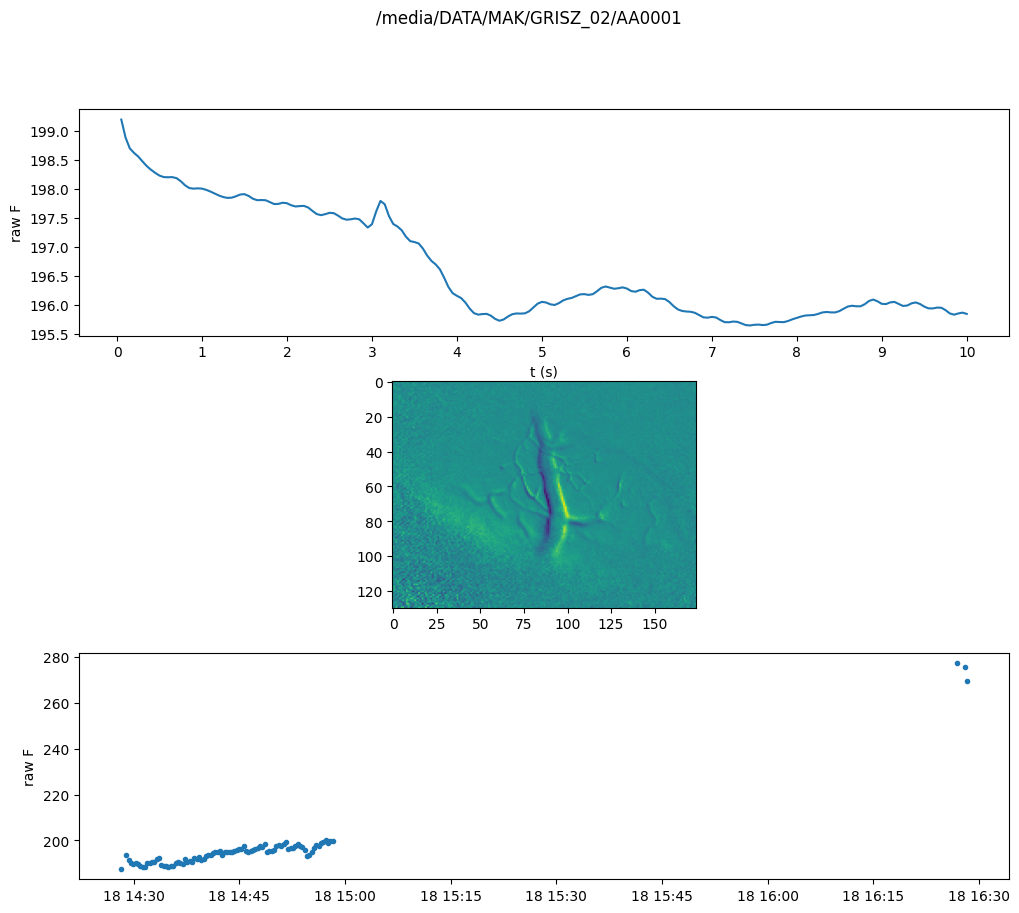

In [7]:
experimentAvgPlot(qFiles=qFiles)

# investigate movement

In [8]:
# run getEdgeROI.py to get mask 
# must be run locally
import joblib

maskFiles = glob.glob(os.path.join(dPath,'*_mask.joblib'))
maskFiles


['/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0015_mask.joblib',
 '/media/DATA/MAK/GRISZ_02/AA0001/AA0001AAAA0035_mask.joblib']

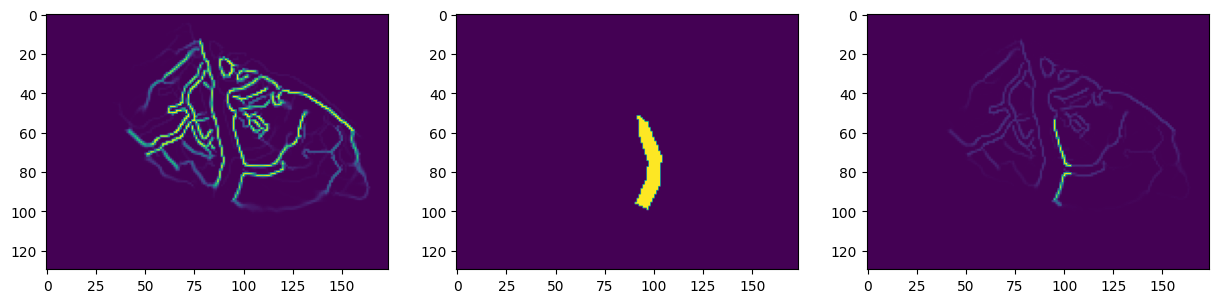

In [9]:
from lib.edges import *

maskFile = maskFiles[0]
mask = joblib.load(maskFile.replace('.qcamraw','_mask.joblib'))
# edges,edgesMasked,x,y = getEdgeReTimeViaMask(im,mask)

allEdges = []
for el in imgs:
    edges,edgesMasked,x,y = getEdgeReTimeViaMask(el,mask)
    allEdges.append(edges)

fig,ax = plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(np.array(allEdges).mean(axis=(0,1)))
ax[1].imshow(mask)
# ax[1].imshow(((mask*1)+0.25)*np.array(edges).mean(axis=0))
ax[2].imshow(((mask*1)+0.15)*np.array(allEdges).mean(axis=(0,1)))

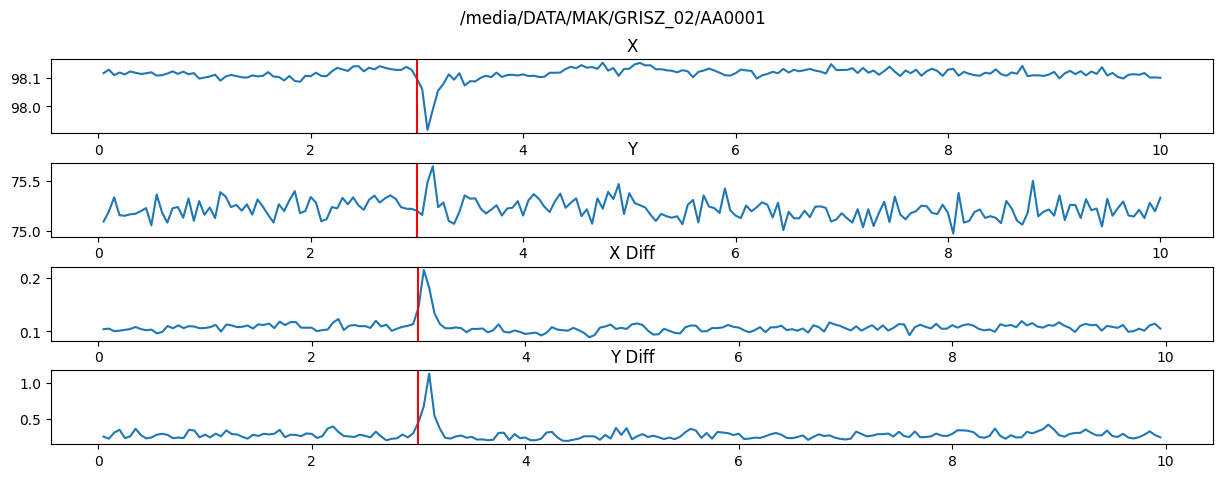

In [10]:
uX,uY,Xdiff,Ydiff = getExperimentEdgeDisp(qFiles,mask)
fig,ax = plotEdgeDisplacement(t,uX,uY,Xdiff,Ydiff)
fig.suptitle(dPath)
fig.show()

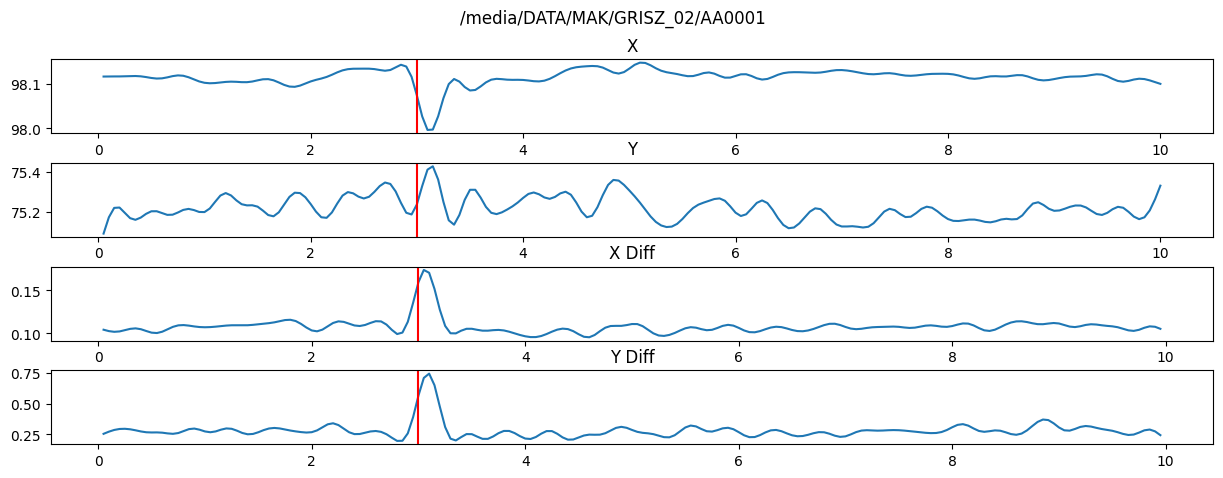

In [11]:
cutoff = 3
fig,ax = plotEdgeDisplacement(t,*[butterFilter(el,cutoff_freq=cutoff) for el in [uX,uY,Xdiff,Ydiff]])
fig.suptitle(dPath)
fig.show()